In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Parameters, neurons: input, hidden, output
N_i = 3; N_h = 4; N_o = 2

# XOR input
r_i = np.matrix('0 1 0 1; 0 0 1 1')
r_i = np.matrix('0 1 0 1; 0 0 1 1; 1 1 1 1')

# XOR output
# Two classes encoding
r_d = np.matrix('0 1 1 0; 1 0 0 1')

r_i.T, r_d.T

(matrix([[0, 0, 1],
         [1, 0, 1],
         [0, 1, 1],
         [1, 1, 1]]),
 matrix([[0, 1],
         [1, 0],
         [1, 0],
         [0, 1]]))

In [42]:
w_h = np.random.rand(N_h+1,N_i) - 0.5
# Output layer
w_o=np.random.rand(N_o,N_h+1) - 0.5

w_h, w_o, r_h, r_o

(array([[ 0.24432405, -0.35934823,  0.36958703],
        [-0.30744573, -0.06672761, -0.31301534],
        [ 0.22937789, -0.39369464, -0.26497834],
        [ 0.09365777,  0.20408995,  0.00050928],
        [ 0.01902742,  0.02501798, -0.1978453 ]]),
 array([[-1.43106167e-01,  3.96316203e-01, -3.33666417e-01,
          1.70454592e-04, -3.59187728e-02],
        [-1.04675637e-01,  7.17701285e-02, -1.92996400e-01,
         -2.22635393e-01, -3.93147290e-01]]),
 matrix([[0.50994147],
         [0.56432069],
         [0.46892843],
         [0.57830649],
         [0.37859029]]),
 matrix([[0.95675364],
         [0.0433192 ]]))

In [46]:
i = 0
r_h = 1 / (1 + np.exp(-w_h*r_i[:,i]))
r_h[-1] = 1
r_h

matrix([[0.59135919],
        [0.4223789 ],
        [0.43414032],
        [0.50012732],
        [1.        ]])

https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e

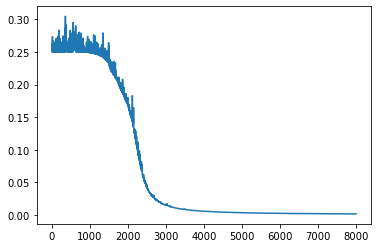

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Parameters, neurons: input, hidden, output
N_i = 3; N_h = 4; N_o = 2

# XOR input
# r_i = np.matrix('0 1 0 1; 0 0 1 1')
r_i = np.matrix('0 1 0 1; 0 0 1 1; 1 1 1 1')

# XOR output
# Two classes encoding
r_d = np.matrix('0 1 1 0; 1 0 0 1')


def mlp(r_i, r_d, N_i, N_h, N_o, training_steps=5000, lr=0.7, batch_size=1):

    # Initialize randomly the weights
    # Hidden layer
    w_h = np.random.rand(N_h+1,N_i) - 0.5
    # Output layer
    w_o=np.random.rand(N_o,N_h+1) - 0.5

    mse = []

    for ti in range(training_steps):
        # Select training pattern randomly
        #i = np.floor(4*np.random.rand()).astype('int')
        for bi in range(batch_size):
            # Feed-forward the input to hidden layer
            i = np.floor(np.shape(r_i)[1]*np.random.rand()).astype('int')
            r_h = 1 / (1 + np.exp(-w_h*r_i[:,i]))
            r_h[-1] = 1
            #r_h = np.concatenate((r_h, np.ones((1,1))), axis=0)
            # Feed-forward the input to the output layer
            r_o = 1 / (1 + np.exp(-w_o*r_h))
            # Calculate the network error
            d_o = np.multiply(np.multiply(r_o, 1-r_o), r_d[:,i] - r_o)
            # Calculate the responsability of the hidden network in the error
            d_h = np.multiply(np.multiply(r_h, (1-r_h)), (w_o.T*d_o))
            # Update weights
            w_o = w_o + lr*(r_h*d_o.T).T
            w_h = w_h + lr*(r_i[:,i]*d_h.T).T
            
        # Test all patterns
        #r_o_test = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*r_i)))))
        rht = 1 / (1 + np.exp(-w_h*r_i))
        rht[-1] = 1
        r_o_test = 1 / (1 + np.exp(-w_o*rht))
        mse += [mean_squared_error(r_d, r_o_test)]
        
    return mse, r_o_test, w_h, w_o

result = mlp(r_i, r_d, N_i, N_h, N_o, training_steps=8000, lr=0.7, batch_size=1)
plt.plot(result[0])

In [164]:
# XOR input
r_i = np.matrix('0 1 0 1; 0 0 1 1')
# THIS IS THE MLP f(X)=y_pred
# Feed-forward input to output layer
r_o_test = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*r_i)))))
r_o_test

matrix([[0.05924721, 0.94605584, 0.94216449, 0.50330879],
        [0.94080532, 0.05389135, 0.05780828, 0.49661925]])

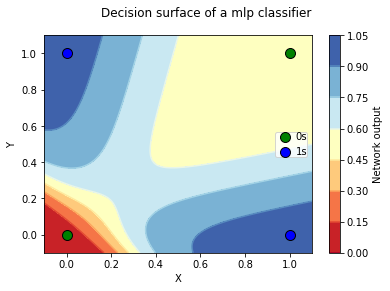

In [165]:
# Parameters
n_classes = 2
plot_colors = "gb"
plot_markers = "oo"

x_min, x_max = -0.1, 1.1
y_min, y_max = -0.1, 1.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# THIS IS THE MLP f(X)=y_pred=Z
# Feed-forward input to output layer
Z = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*np.c_[xx.ravel(), yy.ravel()].T)))))[0]

Z = Z.reshape(xx.shape)

# Plot contour
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
csl = plt.contour(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Make a colorbar for the cs returned by the contourf call.
cbar = plt.colorbar(cs)
cbar.ax.set_ylabel('Network output')
# Add the contour line levels to the colorbar
cbar.add_lines(csl)

plt.xlabel("X")
plt.ylabel("Y")

t_names = ["0s", "1s"]

rd = np.squeeze(np.asarray(r_d[0]))

# Plot the training points
for i, color, m in zip(range(n_classes), plot_colors, plot_markers):
    idx = np.where(rd == i)
    plt.scatter(np.squeeze(np.asarray(r_i.T[list(idx[0]),0])), 
                np.squeeze(np.asarray(r_i.T[list(idx[0]),1])), 
                c=color, label=t_names[i], cmap=plt.cm.RdYlBu, 
                edgecolor='black', s=100, marker=m)

plt.suptitle("Decision surface of a mlp classifier")
plt.legend(loc='center right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

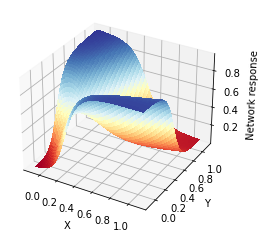

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, Z, cmap=plt.cm.RdYlBu,
                       linewidth=0, antialiased=False)

ax.view_init(30, -60)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Network response')

plt.show()

In [148]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:4]  # we only take the first two features.
y = iris.target

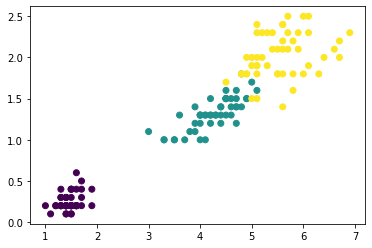

In [149]:
plt.scatter(X[:,0], X[:,1], c=y)

In [48]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, y_train

(array([[1.4, 0.2],
        [4.5, 1.7],
        [4.8, 1.4],
        [1.5, 0.1],
        [4. , 1.3],
        [5. , 1.9],
        [4.2, 1.3],
        [5.1, 1.5],
        [6.1, 2.3],
        [6.7, 2.2],
        [6.6, 2.1],
        [4.5, 1.5],
        [3.5, 1. ],
        [4.1, 1. ],
        [4. , 1.2],
        [1.6, 0.2],
        [1.5, 0.3],
        [5.8, 1.8],
        [5.5, 1.8],
        [1.5, 0.4],
        [4.9, 1.5],
        [1.6, 0.2],
        [6.4, 2. ],
        [1.6, 0.2],
        [3.7, 1. ],
        [5.6, 1.8],
        [5.3, 1.9],
        [1.6, 0.4],
        [4.9, 2. ],
        [1.3, 0.3],
        [1.5, 0.4],
        [4. , 1.3],
        [4.6, 1.4],
        [1.5, 0.4],
        [5.4, 2.1],
        [5.4, 2.3],
        [3.5, 1. ],
        [3.9, 1.4],
        [5.7, 2.5],
        [4.8, 1.8],
        [1.4, 0.3],
        [4.7, 1.4],
        [1.3, 0.4],
        [6.1, 1.9],
        [1.4, 0.2],
        [1.4, 0.3],
        [5.1, 1.9],
        [1.2, 0.2],
        [1.3, 0.3],
        [1.4, 0.1],


<AxesSubplot:>

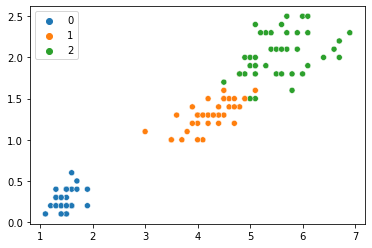

In [182]:
import seaborn as sns
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train, palette=sns.color_palette("tab10")[:3])

In [167]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(handle_unknown='ignore')

mlp_encoding = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

X_train = np.concatenate((X_train, np.ones((120,1))), axis=1)

r_i = np.matrix(X_train.transpose())
r_d = np.matrix(mlp_encoding.transpose())

#r_i.T, r_d.T

In [183]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
#X_train_scaled

In [184]:
X_train_scaled = np.concatenate((X_train_scaled, np.ones((120,1))), axis=1)
mlp_encoding = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

In [185]:
r_i = np.matrix(X_train_scaled.transpose())
r_d = np.matrix(mlp_encoding.transpose())
#r_i.T, r_d.T

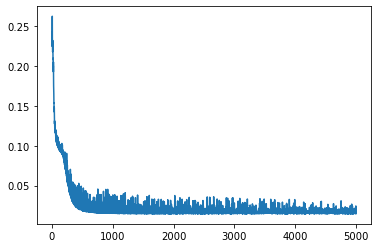

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = np.concatenate((X_train_scaled, np.ones((120,1))), axis=1)
mlp_encoding = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
r_i = np.matrix(X_train_scaled.transpose())
r_d = np.matrix(mlp_encoding.transpose())

# Parameters, neurons: input, hidden, output
N_i = 3; N_h = 2; N_o = 3

result = mlp(r_i, r_d, N_i, N_h, N_o, training_steps=5000, lr=0.8, batch_size=10)
plt.plot(result[0])

<AxesSubplot:>

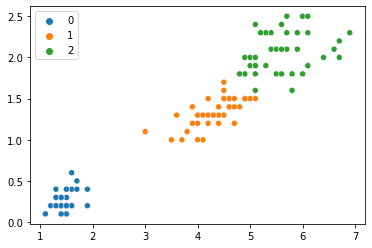

In [199]:
y_pred = [np.where(result[1].T[i] == result[1].T[i].max())[1][0] for i in range(len(y_train))]
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_pred, palette=sns.color_palette("tab10")[:3])

<AxesSubplot:>

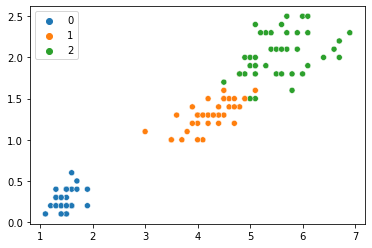

In [195]:
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train, palette=sns.color_palette("tab10")[:3])

In [201]:
def mlp_predict(r_i, w_h, w_o):
    # Test all patterns
    #r_o_test = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*r_i)))))
    rht = 1 / (1 + np.exp(-w_h*r_i))
    rht[-1] = 1
    r_o_test = 1 / (1 + np.exp(-w_o*rht))
    return r_o_test

<AxesSubplot:>

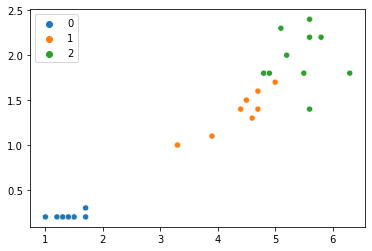

In [202]:
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test, palette=sns.color_palette("tab10")[:3])

<AxesSubplot:>

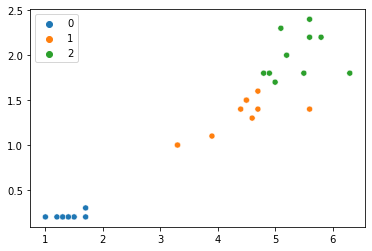

In [207]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = np.concatenate((X_test_scaled, np.ones((30,1))), axis=1)
r_i = np.matrix(X_test_scaled.transpose())

def mlp_predict(r_i, w_h, w_o):
    # Test all patterns
    #r_o_test = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*r_i)))))
    rht = 1 / (1 + np.exp(-w_h*r_i))
    rht[-1] = 1
    r_o_test = 1 / (1 + np.exp(-w_o*rht))
    return r_o_test

result_test = mlp_predict(r_i, result[2], result[3])
y_pred = [np.where(result_test.T[i] == result_test.T[i].max())[1][0] for i in range(len(y_test))]
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred, palette=sns.color_palette("tab10")[:3])